In [ ]:

#https://www.kaggle.com/c/dog-breed-identification

In [ ]:
# 구글드라이브에 있는  파일에 대한 id를 가지고
# colab에 다운로드 함..
# 이것을 실행하면
# colab의 content에 train.zip, test.zip
!gdown https://drive.google.com/uc?id=1szLijK-O-QT5LA9ytCPassTtxMg-uJ_y
!gdown https://drive.google.com/uc?id=1z3n7y7RQKlseNBpb4XoRLKjTQGd8pExH

Downloading...
From (original): https://drive.google.com/uc?id=1szLijK-O-QT5LA9ytCPassTtxMg-uJ_y
From (redirected): https://drive.google.com/uc?id=1szLijK-O-QT5LA9ytCPassTtxMg-uJ_y&confirm=t&uuid=71d8d548-a31e-4670-b785-6a39126e461d
To: /content/train.zip
100% 361M/361M [00:03<00:00, 104MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1z3n7y7RQKlseNBpb4XoRLKjTQGd8pExH
From (redirected): https://drive.google.com/uc?id=1z3n7y7RQKlseNBpb4XoRLKjTQGd8pExH&confirm=t&uuid=8556e361-c31e-4bd0-a6d1-0f46efcdf329
To: /content/test.zip
100% 363M/363M [00:03<00:00, 115MB/s]


In [ ]:
# 샘플 submission, labels.csv 파일 다운로드
!gdown 1Iq0uGTax-qpAQbjdYrFPEJivoFLFc0bR
!gdown 1kKSzJISTf06tVccOwAC-1HEsdHzFKuwS

Downloading...
From: https://drive.google.com/uc?id=1Iq0uGTax-qpAQbjdYrFPEJivoFLFc0bR
To: /content/sample_submission.csv
100% 25.2M/25.2M [00:00<00:00, 186MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kKSzJISTf06tVccOwAC-1HEsdHzFKuwS
To: /content/labels.csv
100% 482k/482k [00:00<00:00, 81.3MB/s]


In [ ]:
# colab에서 zip 파일 풀기 unzip
# zip 파일을 푸는 과정
!unzip -qq "/content/train.zip" -d "/content/train/"

In [ ]:
!unzip -qq "/content/test.zip" -d "/content/test/"

In [ ]:
import os
import glob

In [ ]:
len(list(glob.glob("/content/train/*.jpg"))) # 파일 개수

10222

In [ ]:
len(list(glob.glob("/content/test/*.jpg"))) # 파일 개수

10357

In [ ]:
# 뒤에 모델을 활용해서 적용을 할 때는 폴더 구조로 학습을 시킴
# train폴더 안에 sub폴더명이 정답지의 이름으로 구성
# sub폴더 안에 원하는 데이터의 이미지들이 있어야 함

# 예) trian/~~.jpg, ~~ .jpg 구성
# train/진돗개/1111.jpg 처럼 구별

In [ ]:
# 폴더 세팅 : train / test org
# ------> 새로운 경로에 하위 폴더를 종별로 선별해서 생성

In [ ]:
train_data_folder = '/content/train/'
test_data_folder = '/content/test/'


# train -> 종류별로
train_data_sub_folder = "/content/train_sub/"
# valid 나, test에 대한 정답을 안다면
# test_Data_Sub_folder = "content/test_sub"
# 정답에 대한 팡리 label.csv 파일을 불러와서
# 여기에 있는 기준대로 폴더도 생성하고, 파일도 복사
# -> 파일 정리의 기준
# 참고) csv 파일이니 pandas



import pandas as pd

In [ ]:
label_path = '/content/labels.csv'
label_text = pd.read_csv(label_path)
label_text.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# 학습할 데이터의 견종의 수
len(label_text.loc[:,"breed"].unique())
# -> 문서에 있는 120견종에 대한 부분이 일치

120

In [ ]:
# 체크2) 각 종류별로 균형이 맞는지 안 맞는지
# -> 견종별로 몇 장이 데이터가 있는지 체크

label_text.loc[:,"breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

In [ ]:
# -> 견종별로 완벽하게 엇비슷하게 데이터가 있지는 않음
# 통일되게 66장으로 하겠다
# 데이터 증강을 통해서 120장으로 하겠다 -> 선택사항
# 시간적 요소!
# 코드적으로 데이터 증강을 하면 오히려 방해가 될 수 있음


In [ ]:
# 체크3) 이미지 파일의 수 == 정답지의 수 체크.....
len(list(glob.glob("/content/train/*.jpg")))

10222

In [ ]:
glob.glob("/content/train/*.jpg")

['/content/train/7357e516c31c862461b63e21e52213d1.jpg',
 '/content/train/489bc4360c9c9eaf34201ed5373afad7.jpg',
 '/content/train/2a38b087dcb10edfa2b4aecc882419ab.jpg',
 '/content/train/80fc19d0a8dd3ef1cfabf0525efc3414.jpg',
 '/content/train/815949fad325d5bd758bd46c2bbccfaf.jpg',
 '/content/train/1e1650836e5d0dc6b49b2d3c91b36d59.jpg',
 '/content/train/7bee9b5f4b86a63cb4689f7f5ee13162.jpg',
 '/content/train/f64d8dfc5544c9fb4bdc578a7756dfd7.jpg',
 '/content/train/a44e6838a3b66411426d3f2961408b29.jpg',
 '/content/train/b23d0aef01e57245cdcd4af901a04ae9.jpg',
 '/content/train/5ca52df98ea1aaaf527d1ef4df6faf3d.jpg',
 '/content/train/57b86091d423c595363d1d78a53a0b98.jpg',
 '/content/train/56af8255b46eb1fa5722f37729525405.jpg',
 '/content/train/e483418ed3331b5bdbd39cf4539fbfb5.jpg',
 '/content/train/992985d9287168502fa34d6de994e946.jpg',
 '/content/train/5f49abbd269cee0dffc6bcde1daa6bd3.jpg',
 '/content/train/fb9ee245256bc5c3e14f32c8c69cf6a8.jpg',
 '/content/train/9dc1b89d30ce214f27c8a3327c2f448

In [ ]:
len(label_text)

10222

In [ ]:
# 10222장의 이미지들을 정답지를 반영해서 하위 폴더 구조로 변경을 하면 됨
# 대상 : glob.golb("/content/trian/*.jpg") 이미지 리스트들만

In [ ]:
# 데이터 탐색
# 이미지 데이터에 대한 탐색 시각화

import matplotlib.pyplot as plt
# 1) matplot
# 2) opencv
# 3) tensorflow~ image
# 본인이 했던 코드 재활용, 검색해서 나오는 거 복붙

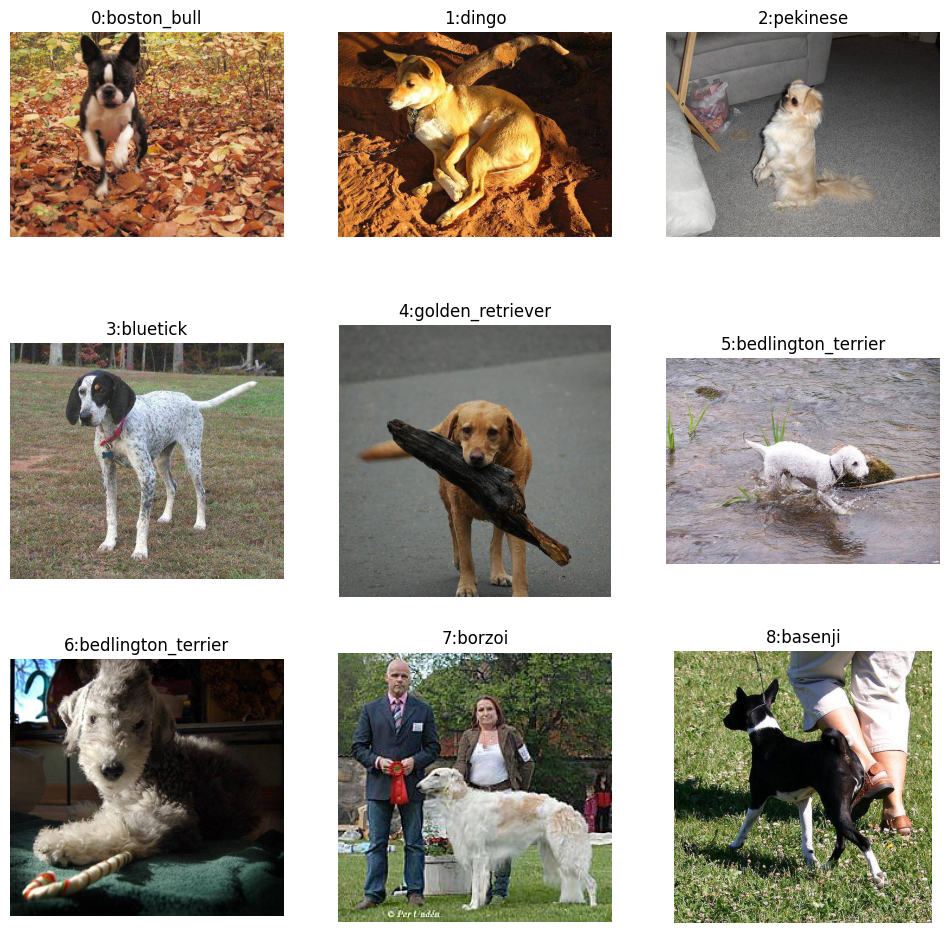

In [ ]:
plt.figure(figsize = (12,12))
# -> 임의로 train 폴더에 있는 9개를 가지고 와서 탐색을 해보겠음
for c in range(9):# 숫자를 쓴 이유는 sub-plot 에 위치를 잡기 위해서
  # 정답df 에서 해당 id를 가지고 오겠음
  # -> id.jpg를 붙여서 이미지를 땡겨오려고 함
  image_id = label_text.at[c,"id"]
  image_breed = label_text.at[c, "breed"]

  # 9개 그리기 위한 그림에 대한 위치
  plt.subplot(3,3, c+1)

  # train 폴더에서 해당하는 image_id 이미지 파일을 가져와야 함
  image_file = train_data_folder + image_id  + '.jpg'
  plt.imshow(plt.imread(image_file))
  plt.title(str(c)+":"+image_breed)
  plt.axis("off")

plt.show()

In [ ]:
# 내가 직접 만들어서 할 수도 있지만
# 기존에 이미 잘 학습된 모델의 그대로 가지고 와서
# 수정해서 사용하기

# 사전 연구들을 조사하는 것

In [ ]:
# 학습을 하려고 보니 폴더 구조가 문제가 됨
# 종별로 하위 폴더 구성을 하려고 함

import os
import time

# colab에서 할 때 : 파일 복사 등..
import shutil


In [ ]:
# 파일 정리
# 1) train_sub 폴더가 없으면 생성해주세요!!!!!
train_data_sub_folder_name = os.path.dirname(train_data_sub_folder)
# 혹시 없는 폴더면,,폴더 생성해주세요...os.mkdir
if os.path.isdir(train_data_sub_folder_name) ==False:
    os.mkdir(train_data_sub_folder_name)

# 2) train_sub폴더가 생성 되었으면,,,
#     --> 정답지에 있는 파일들을 돌려가면서
#         해당하는 종에 대한 하위 폴더가 없으면
#             --> 폴더 생성
#             --> 그 이미지 복사
#         해당한느 종에 대한 하위 폴더가 있다면,,
#             --> 그 폴더 위치만
#             --> 그 이미지 복사.

In [ ]:
for i in range(len(label_text)):
    # 각 데이터에서 이미지에 대한 id, 견종
    image_id = label_text.at[i, "id"]
    image_breed = label_text.at[i, "breed"] # 하위폴더명,체크/사용

    # 견종별 하위 폴더에 대한 경로를 조립...문자열
    if os.path.exists( train_data_sub_folder+image_breed)==False:
        os.mkdir(train_data_sub_folder+image_breed)
    # ==> 정답지를 보고,,,하위 폴더가 없으면 생성....

    # 기존에 train 폴더에서 다른 폴더내에 있는 서브 폴더로 이동.
    # 복사 : 무엇을 ---> 어디로 복사.
    # /content/train/1111.jpg
    #  ---> /content/train_sub/도사견/111.jpg
    shutil.copy( train_data_folder + image_id+".jpg",
                 train_data_sub_folder+image_breed )


In [ ]:
# 참고) 동일한 위의 코드인데,,,,
#       기준이 되는 폴더가 구글 드라이브에서 하면,,,
#       시간이 엄청 걸리니...최대한,,,colab 해결을하세요!!!


# 체크) 내가 생성한 하위 폴더의 수가 정답 종류인 120개 맞냐..
len(os.listdir(train_data_sub_folder))

120

In [ ]:
# ===>
# 1단계 : 단순히 입력을 위한 폴더/ 파일 구조만 변경을 함!!!!

In [ ]:
# 2단계 : 이 파일 구조를 기반으로 모델에 전달할
#         generator를 만들어야 함!!!!

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input

In [ ]:
# 참고 링크 : https://keras.io/api/applications/
# ---> 내가 어떤 모델을 차용해서 사용할지 정할 수 있음!!!
# ++++ yolo(여러 이미지 관련 최신 모델들을 배포... )

# ===> 입력을 변경을 할 수는 있는데,,,기존은 224,224
# +++ 기존 모델과 내 모델의 목적이 다름!!!
# 기존 : 1000가지 이미지 분류
# 나의 튜닝 : 강아지 중심 120이미지 분류!!!
# ===> 뒤에는 수정을 해야함!!!!

In [ ]:
# 내가 차용할 모델은 InceptionV3선택!!!
# --> 다양한 이미지들에 대해서 학습한 ImageNet 셋으로 학습한 것을
#     차용하겠다...( 다양한 이미지들의 특성을 잘 뽑겠지!!!)
# 다만, ImageNet 셋이 1000종류로 분류
# ==> output 수정을 해야할 듯!!!!!

# include_top : 나의 용도로 세팅을 해서 밀어 넣겠음...

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=True)
base_model.summary()

96112376/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(base_model, show_shapes=True )

In [ ]:
# 잘 학습된 모델 구조와 가중치를 가지고 옴
# 활용방식은 여러개 존재함

# m1) 애가 잘 했을 거라 생각하고 그냥 쓰기
for layer in base_model.layers :
  layer.trainable = False

# 특징 추출에 대한 것들은 오로지 기존 모델로 사용하고
# weight는 내 데이터로 변경하지 말자
# -> 뒤에 분류만 나의 데이터로 학습하면서 최적화하자
#   학습할 weight의 수가 확 줄어듬


In [ ]:
# m2) 구조는 좋으니깐 내 것으로 처음부터 끝까지 다 다시 학습하자
for layer in base_model.layers :
  layer.trainable = True



In [ ]:
# m3) 앞에서는 일반적인 이미지들에 대한 특징을 추출할테니 믿고 가는 것이고,
# 중간에 특징을 뽑아내는 레이어들은 나의 강잊 데이터로 학습을 하자
# inceotion에서 2번째 덩어리

for layer in base_model.layers[:249]:
  layer.trainable = False

for layer in base_model.layers [249:]:
  layer.trainable = True

In [ ]:
# ===> 내가 취사선택할 수 있는 옵션들!!!!!!
#      기존에 잘 학습된 모델을 어떻게 활용할지에 대한
#      활용방안도 고민을 해야 함!!!!!
# 참고) 여기서는 시간 관계상 분류만 학습을 시키겠습니다..
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# 나의 목적에 맞도록 모델 구조를 수정!!!!
# 1) 앞단의 부분..... DataGenetrator~~
# 2) 출력층 : 견종120개로 세팅!!!!

In [ ]:
# 최종 출력에대한 종류
num_classes = len(os.listdir(train_data_sub_folder))
num_classes

120

In [ ]:
# 기존의 불러온 모델의 최종단을 수정!!!
# --> 기존 모델의 아웃풋을 가지고 와야 함..
x = base_model.output
print(x)
print(x.shape)

KerasTensor(type_spec=TensorSpec(shape=(None, 1000), dtype=tf.float32, name=None), name='predictions/Softmax:0', description="created by layer 'predictions'")
(None, 1000)


In [ ]:
# 뒤에 출력에 대한 분류에 대한 네트워크는 없었음...
# ===> 좀 구성을 하려고 함!!!!! 120종 분류에 맞춰서..

x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense( 1024, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense( 1024, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense( 512, activation = "relu")(x)

# -> 분류에 대한 네트워크 설계 : 함수적인 in/ out
# 출력층에 대한 설계

pred = Dense(num_classes, activation = "softmax")(x)

# 전체적인 모델을 조립
model = Model(inputs = base_model.input,
              outputs = pred)